In [ ]:
# import numpy as np
# np.version.version
!pip install numpy==1.19

In [110]:
# https://www.kaggle.com/datasets/guillemservera/grains-and-cereals-futures
import pandas as pd
import numpy as np
grains_df = pd.read_csv('all_grains_data.csv')
grains_df

,ticker,commodity,date,open,high,low,close,volume
0,ZC=F,Corn,2000-07-17,182.25,182.25,178.25,179.25,19385
1,ZC=F,Corn,2000-07-18,179.00,183.25,179.00,180.75,25205
2,ZC=F,Corn,2000-07-19,180.00,182.75,178.75,182.00,17126
3,ZC=F,Corn,2000-07-20,181.50,187.00,181.00,186.00,18742
4,ZC=F,Corn,2000-07-21,185.50,188.00,185.00,187.75,16814
...,...,...,...,...,...,...,...,...
34860,ZS=F,Soybean,2023-09-06,1365.50,1365.50,1359.50,1360.25,102
34861,ZS=F,Soybean,2023-09-07,1349.50,1350.00,1345.00,1345.00,310
34862,ZS=F,Soybean,2023-09-08,1339.00,1349.50,1339.00,1349.50,198
34863,ZS=F,Soybean,2023-09-11,1352.50,1352.50,1352.00,1352.50,36


In [111]:
grains_df['commodity'].unique()

array(['Corn', 'Oat', 'KC HRW Wheat', 'Rough Rice', 'Soybean Oil',
       'Soybean'], dtype=object)

In [112]:
corn_df = pd.read_csv('individual_data/Corn_data.csv')
corn_df

,date,open,high,low,close,volume
0,2000-07-17,182.25,182.25,178.25,179.25,19385
1,2000-07-18,179.00,183.25,179.00,180.75,25205
2,2000-07-19,180.00,182.75,178.75,182.00,17126
3,2000-07-20,181.50,187.00,181.00,186.00,18742
4,2000-07-21,185.50,188.00,185.00,187.75,16814
...,...,...,...,...,...,...
5786,2023-09-06,473.50,476.25,471.25,471.50,841
5787,2023-09-07,471.25,474.00,468.50,470.75,741
5788,2023-09-08,471.25,472.25,467.00,468.50,233
5789,2023-09-11,470.25,471.50,468.00,471.25,430


In [113]:
corn_dict = {}
window_size = 7
for i in range(window_size):
    corn_dict['price_'+str(7-i)+'_days_ago'] = corn_df['close'][i:-7+i].reset_index(drop=True) 
corn_dict    

{'price_7_days_ago': 0       179.25
 1       180.75
 2       182.00
 3       186.00
 4       187.75
          ...  
 5779    470.75
 5780    478.50
 5781    469.50
 5782    461.75
 5783    461.00
 Name: close, Length: 5784, dtype: float64,
 'price_6_days_ago': 0       180.75
 1       182.00
 2       186.00
 3       187.75
 4       184.50
          ...  
 5779    478.50
 5780    469.50
 5781    461.75
 5782    461.00
 5783    464.75
 Name: close, Length: 5784, dtype: float64,
 'price_5_days_ago': 0       182.00
 1       186.00
 2       187.75
 3       184.50
 4       182.75
          ...  
 5779    469.50
 5780    461.75
 5781    461.00
 5782    464.75
 5783    471.00
 Name: close, Length: 5784, dtype: float64,
 'price_4_days_ago': 0       186.00
 1       187.75
 2       184.50
 3       182.75
 4       180.50
          ...  
 5779    461.75
 5780    461.00
 5781    464.75
 5782    471.00
 5783    471.50
 Name: close, Length: 5784, dtype: float64,
 'price_3_days_ago': 0       187.75
 1  

In [114]:
X = pd.DataFrame.from_dict(corn_dict)
X

,price_7_days_ago,price_6_days_ago,price_5_days_ago,price_4_days_ago,price_3_days_ago,price_2_days_ago,price_1_days_ago
0,179.25,180.75,182.00,186.00,187.75,184.50,182.75
1,180.75,182.00,186.00,187.75,184.50,182.75,180.50
2,182.00,186.00,187.75,184.50,182.75,180.50,181.00
3,186.00,187.75,184.50,182.75,180.50,181.00,180.25
4,187.75,184.50,182.75,180.50,181.00,180.25,180.25
...,...,...,...,...,...,...,...
5779,470.75,478.50,469.50,461.75,461.00,464.75,471.00
5780,478.50,469.50,461.75,461.00,464.75,471.00,471.50
5781,469.50,461.75,461.00,464.75,471.00,471.50,470.75
5782,461.75,461.00,464.75,471.00,471.50,470.75,468.50


In [115]:
y = corn_df['close'][7:].reset_index(drop=True) 
y

0       180.50
1       181.00
2       180.25
3       180.25
4       179.75
         ...  
5779    471.50
5780    470.75
5781    468.50
5782    471.25
5783    476.75
Name: close, Length: 5784, dtype: float64

In [116]:
train_pct = .9
X_train = X[:int(len(X)*train_pct)]
X_test = X[int(len(X)*train_pct):]
y_train = y[:int(len(y)*train_pct)]
y_test = y[int(len(y)*train_pct):]

In [63]:
from sklearn.linear_model import LinearRegression
  
classifier = LinearRegression()
classifier.fit(X_train, y_train)

LinearRegression()

In [64]:
print (classifier.score(X_train, y_train))
print(classifier.score(X_test, y_test))
# very high coefficient of determination on the train set, lower on the test set

0.9971498308553326
0.971229819095482


In [65]:
y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)
from sklearn.metrics import mean_squared_error
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print(train_mse, test_mse)
# mse considerably higher on test set than train set
# higher in general than I would have thought. maybe I should compare these scores to a simple naive prediction using 
# the previous value.

65.14954633823858 193.58699139121558


In [66]:
y_train_pred

array([183.1865224 , 180.69614961, 181.4084901 , ..., 656.58183816,
       664.93181076, 658.73352565])

In [67]:
y_train

0       180.50
1       181.00
2       180.25
3       180.25
4       179.75
         ...  
5200    658.25
5201    658.25
5202    664.50
5203    659.50
5204    657.25
Name: close, Length: 5205, dtype: float64

In [68]:
X_train = X_train.to_numpy()

In [69]:
X_train

array([[179.25, 180.75, 182.  , ..., 187.75, 184.5 , 182.75],
       [180.75, 182.  , 186.  , ..., 184.5 , 182.75, 180.5 ],
       [182.  , 186.  , 187.75, ..., 182.75, 180.5 , 181.  ],
       ...,
       [759.5 , 757.5 , 719.  , ..., 652.5 , 658.25, 658.25],
       [757.5 , 719.  , 685.  , ..., 658.25, 658.25, 664.5 ],
       [719.  , 685.  , 652.5 , ..., 658.25, 664.5 , 659.5 ]])

In [70]:
X_test = X_test.to_numpy()


In [71]:
# Build the Model
import tensorflow as tf
model_tune = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[window_size]),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])

# Print the model summary
model_tune.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_2 (Lambda)           (None, 7, 1)              0         
                                                                 
 bidirectional_2 (Bidirectio  (None, 7, 64)            8704      
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)               24832     
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
 lambda_3 (Lambda)           (None, 1)                 0         
                                                                 
Total params: 33,601
Trainable params: 33,601
Non-trai

In [ ]:
# Set the learning rate scheduler
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-12 * 10**(epoch / 20))

# Initialize the optimizer
optimizer = tf.keras.optimizers.SGD(momentum=0)

# Set the training parameters
model_tune.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=optimizer)
#tf.keras.losses.Huber()
# Train the model
history = model_tune.fit(X_train, y_train, epochs=160, callbacks=[lr_schedule])

(1e-12, 0.0001, 0.0, 150000.0)

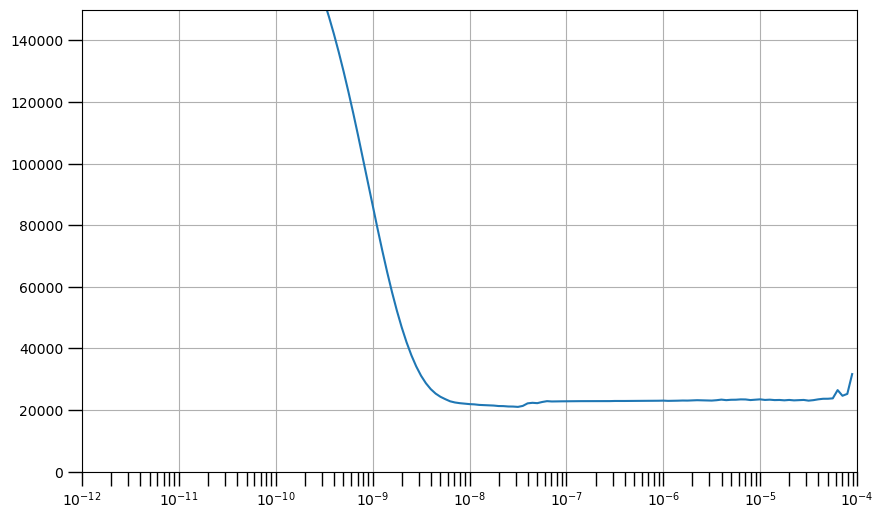

In [73]:
import matplotlib.pyplot as plt
# Define the learning rate array
lrs = 1e-12 * (10 ** (np.arange(160) / 20))

# Set the figure size
plt.figure(figsize=(10, 6))

# Set the grid
plt.grid(True)

# Plot the loss in log scale
plt.semilogx(lrs, history.history["loss"])

# Increase the tickmarks size
plt.tick_params('both', length=10, width=1, which='both')

# Set the plot boundaries
plt.axis([1e-12, 1e-4, 0, 150000])

In [ ]:
# Reset states generated by Keras
tf.keras.backend.clear_session()

# Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])

# Set the learning rate based on the graph
learning_rate = 1e-9

# Set the optimizer 
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0)


# Set the training parameters
model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=optimizer,
              metrics=["mae"])

# loss=tf.keras.losses.Huber()

# Train the model
history = model.fit(X_train, y_train,epochs=5000)

In [75]:
def plot_series(time, series, format="-", start=0, end=None):
    """
    Visualizes time series data

    Args:
      time (array of int) - contains the time steps
      series (array of int) - contains the measurements for each time step
      format - line style when plotting the graph
      start - first time step to plot
      end - last time step to plot
    """

    # Setup dimensions of the graph figure
    plt.figure(figsize=(10, 6))
    
    if type(series) is tuple:

      for series_num in series:
        # Plot the time series data
        plt.plot(time[start:end], series_num[start:end], format)

    else:
      # Plot the time series data
      plt.plot(time[start:end], series[start:end], format)

    # Label the x-axis
    plt.xlabel("Time")

    # Label the y-axis
    plt.ylabel("Value")

    # Overlay a grid on the graph
    plt.grid(True)

    # Draw the graph on screen
    plt.show()

In [76]:
results = model.predict(X_test)

19/19 [==============================] - 1s 7ms/step


In [77]:
results = results[:,0]

In [78]:
y_test = y_test.to_numpy()
# y_test = y_test[:,0]

In [79]:
time_valid = corn_df['date'][int(len(y)*train_pct)+window_size:]

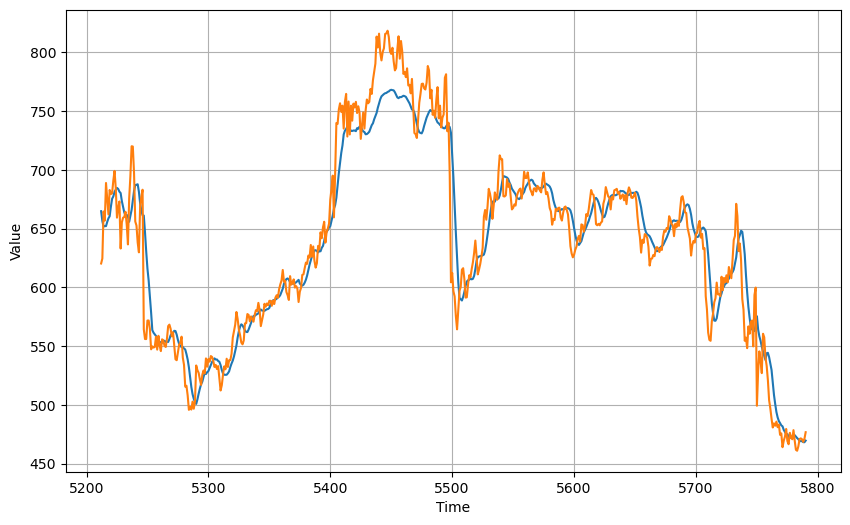

In [80]:
# Plot the results
plot_series(time_valid.index, (results, y_test))

In [81]:
# Compute the MSE and MAE
print(tf.keras.metrics.mean_squared_error(y_test, results).numpy())
print(tf.keras.metrics.mean_absolute_error(y_test, results).numpy())
# higher mse than linear regression

545.3055
16.130384


In [82]:
train_results = model.predict(X_train)
train_results = train_results[:,0]

y_train = y_train.to_numpy()
# y_train = y_train[:,0]


163/163 [==============================] - 1s 7ms/step


In [83]:
print(tf.keras.metrics.mean_squared_error(y_train, train_results).numpy())
print(tf.keras.metrics.mean_absolute_error(y_train, train_results).numpy())

207.37538
9.691518


In [120]:
naive_mse = mean_squared_error(y_test, X_test['price_1_days_ago'])
print(naive_mse)
# naive prediction pretty similar to linear regression

193.26943005181346


In [84]:
wheat_df = pd.read_csv('individual_data/KC_HRW_Wheat_data.csv')
wheat_df

,date,open,high,low,close,volume
0,2000-09-21,296.00,296.00,292.00,293.75,4842
1,2000-09-22,293.50,297.00,293.25,295.50,3945
2,2000-09-25,297.50,300.00,297.00,299.50,5073
3,2000-09-26,301.00,303.50,299.75,302.00,9180
4,2000-09-27,301.50,308.00,301.00,307.75,11145
...,...,...,...,...,...,...
5775,2023-09-06,723.75,746.50,723.75,746.50,55
5776,2023-09-07,741.50,752.75,733.75,733.75,67
5777,2023-09-08,734.75,736.50,725.00,725.00,55
5778,2023-09-11,715.00,718.00,713.75,718.00,13


In [85]:
# use same strategy that was used with corn_dict
wheat_dict = {}
window_size = 7
for i in range(window_size):
    wheat_dict['price_'+str(7-i)+'_days_ago'] = wheat_df['close'][i:-7+i].reset_index(drop=True) 
wheat_dict   

{'price_7_days_ago': 0       293.75
 1       295.50
 2       299.50
 3       302.00
 4       307.75
          ...  
 5768    754.00
 5769    737.50
 5770    714.50
 5771    719.25
 5772    726.50
 Name: close, Length: 5773, dtype: float64,
 'price_6_days_ago': 0       295.50
 1       299.50
 2       302.00
 3       307.75
 4       310.75
          ...  
 5768    737.50
 5769    714.50
 5770    719.25
 5771    726.50
 5772    720.50
 Name: close, Length: 5773, dtype: float64,
 'price_5_days_ago': 0       299.50
 1       302.00
 2       307.75
 3       310.75
 4       320.00
          ...  
 5768    714.50
 5769    719.25
 5770    726.50
 5771    720.50
 5772    721.25
 Name: close, Length: 5773, dtype: float64,
 'price_4_days_ago': 0       302.00
 1       307.75
 2       310.75
 3       320.00
 4       321.00
          ...  
 5768    719.25
 5769    726.50
 5770    720.50
 5771    721.25
 5772    746.50
 Name: close, Length: 5773, dtype: float64,
 'price_3_days_ago': 0       307.75
 1  

In [121]:
X = pd.DataFrame.from_dict(wheat_dict)
X

,price_7_days_ago,price_6_days_ago,price_5_days_ago,price_4_days_ago,price_3_days_ago,price_2_days_ago,price_1_days_ago
0,293.75,295.50,299.50,302.00,307.75,310.75,320.00
1,295.50,299.50,302.00,307.75,310.75,320.00,321.00
2,299.50,302.00,307.75,310.75,320.00,321.00,320.50
3,302.00,307.75,310.75,320.00,321.00,320.50,318.00
4,307.75,310.75,320.00,321.00,320.50,318.00,315.50
...,...,...,...,...,...,...,...
5768,754.00,737.50,714.50,719.25,726.50,720.50,721.25
5769,737.50,714.50,719.25,726.50,720.50,721.25,746.50
5770,714.50,719.25,726.50,720.50,721.25,746.50,733.75
5771,719.25,726.50,720.50,721.25,746.50,733.75,725.00


In [122]:
y = wheat_df['close'][7:].reset_index(drop=True) 
y

0       321.00
1       320.50
2       318.00
3       315.50
4       318.50
         ...  
5768    746.50
5769    733.75
5770    725.00
5771    718.00
5772    726.75
Name: close, Length: 5773, dtype: float64

In [123]:
train_pct = .9
X_train = X[:int(len(X)*train_pct)]
X_test = X[int(len(X)*train_pct):]
y_train = y[:int(len(y)*train_pct)]
y_test = y[int(len(y)*train_pct):]

In [92]:
from sklearn.linear_model import LinearRegression
  
classifier = LinearRegression()
classifier.fit(X_train, y_train)

LinearRegression()

In [93]:
y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)
from sklearn.metrics import mean_squared_error
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print(train_mse, test_mse)
# mse of 129 on train set, 466 on test set. the mse for the wheat dataset is higher than that of the corn dataset.

129.00650099724174 466.10534754178366


In [94]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()
y_train = y_train.to_numpy()

In [95]:
# Build the Model
import tensorflow as tf
model_tune = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[window_size]),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])

# Print the model summary
model_tune.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_2 (Lambda)           (None, 7, 1)              0         
                                                                 
 bidirectional_2 (Bidirectio  (None, 7, 64)            8704      
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)               24832     
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
 lambda_3 (Lambda)           (None, 1)                 0         
                                                                 
Total params: 33,601
Trainable params: 33,601
Non-trai

In [ ]:
# Set the learning rate scheduler
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-12 * 10**(epoch / 20))

# Initialize the optimizer
optimizer = tf.keras.optimizers.SGD(momentum=0)

# Set the training parameters
model_tune.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=optimizer)
#tf.keras.losses.Huber()
# Train the model
history = model_tune.fit(X_train, y_train, epochs=160, callbacks=[lr_schedule])

(1e-12, 0.0001, 0.0, 150000.0)

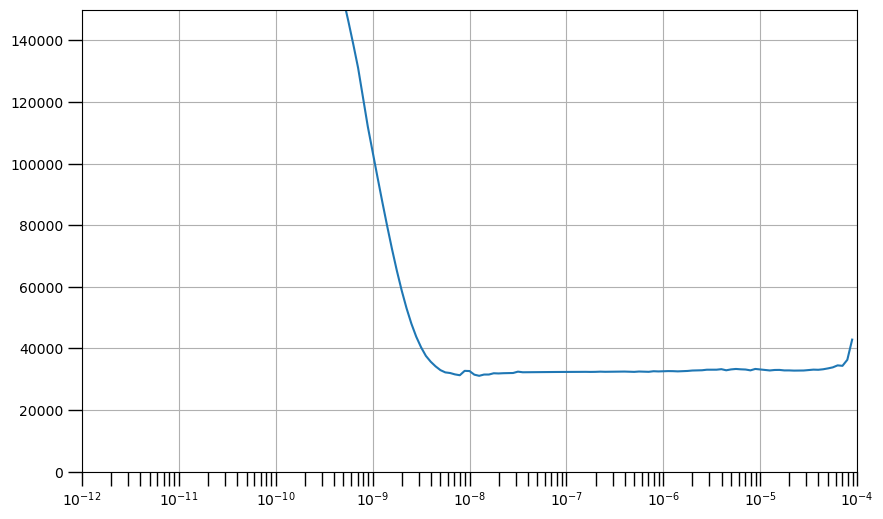

In [97]:
import matplotlib.pyplot as plt
# Define the learning rate array
lrs = 1e-12 * (10 ** (np.arange(160) / 20))

# Set the figure size
plt.figure(figsize=(10, 6))

# Set the grid
plt.grid(True)

# Plot the loss in log scale
plt.semilogx(lrs, history.history["loss"])

# Increase the tickmarks size
plt.tick_params('both', length=10, width=1, which='both')

# Set the plot boundaries
plt.axis([1e-12, 1e-4, 0, 150000])

In [ ]:
# Reset states generated by Keras
tf.keras.backend.clear_session()

# Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])

# Set the learning rate based on the graph
learning_rate = 1e-9

# Set the optimizer 
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0)


# Set the training parameters
model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=optimizer,
              metrics=["mae"])

# loss=tf.keras.losses.Huber()

# Train the model
history = model.fit(X_train, y_train,epochs=5000)

In [105]:
results = model.predict(X_test)
results = results[:,0]
time_valid = wheat_df['date'][int(len(y)*train_pct)+window_size:]

19/19 [==============================] - 2s 3ms/step


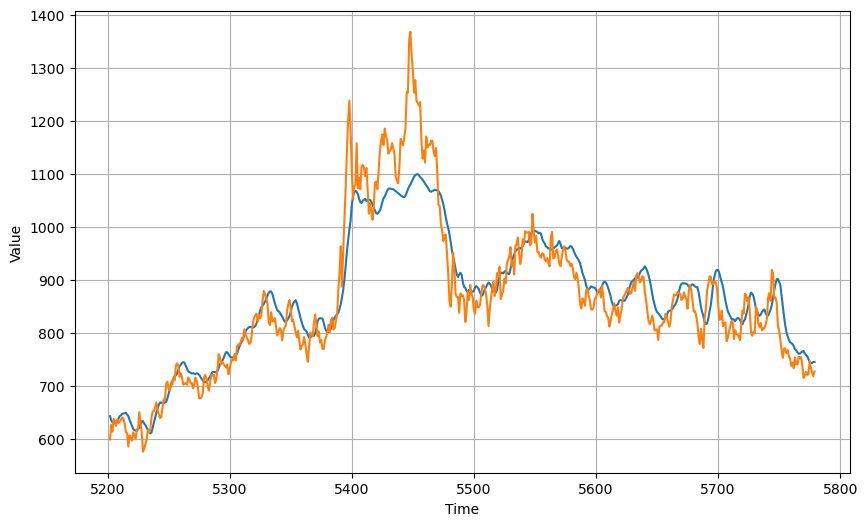

In [106]:
# Plot the results
plot_series(time_valid.index, (results, y_test))

In [107]:
# Compute the MSE and MAE
print(tf.keras.metrics.mean_squared_error(y_test, results).numpy())
print(tf.keras.metrics.mean_absolute_error(y_test, results).numpy())
# higher mse than linear regression again

2786.0554
36.42871


In [124]:
naive_mse = mean_squared_error(y_test, X_test['price_1_days_ago'])
print(naive_mse)
# naive mse very similar to linear regression mse

468.11840397923874
